In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [6]:
g = nx.read_pajek('../data/net/14p.net')
g = nx.Graph(g)

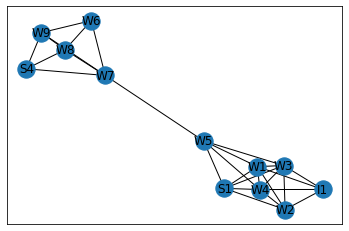

In [7]:
nx.draw_networkx(g)

In [9]:
m0 = nx.to_numpy_matrix(g)
m0

matrix([[0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.]])

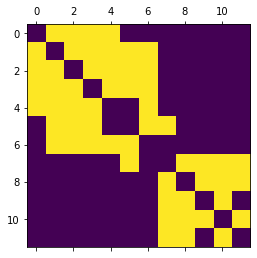

In [10]:
plt.matshow(m0)

In [37]:
ndic = {}
i = 0
for n in g.nodes():
    ndic[n] = i
    i+=1

for u,v in g.edges():
    u2, v2 = ndic[u], ndic[v]
    arr_u = m0[u2][:]
    arr_u = np.delete(arr_u, [u2,v2])
    arr_v = m0[v2][:]
    arr_v = np.delete(arr_v, [u2,v2])
    print(arr_u)
    print(arr_v)
    print(arr_u + arr_v)
    arr_sum = arr_u + arr_v
    c = np.count_nonzero(arr_sum == 2)
    uf = np.count_nonzero(arr_u == 1)
    vf = np.count_nonzero(arr_v == 1)
    print(c, uf, vf)
    break

[[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]]
[[2. 2. 2. 1. 1. 0. 0. 0. 0. 0.]]
3 3 5


In [59]:
m0 # 1 means can be reach from u to v

matrix([[0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.]])

In [84]:
m1 = m0*m0 # the path alternative number to reach from u to v through two steps, 0 means no path in two steps
m1

matrix([[4., 3., 3., 3., 3., 3., 4., 0., 0., 0., 0., 0.],
        [3., 6., 5., 5., 4., 3., 4., 1., 0., 0., 0., 0.],
        [3., 5., 6., 5., 4., 3., 4., 1., 0., 0., 0., 0.],
        [3., 5., 5., 6., 4., 3., 4., 1., 0., 0., 0., 0.],
        [3., 4., 4., 4., 5., 4., 3., 0., 0., 0., 0., 0.],
        [3., 3., 3., 3., 4., 5., 3., 0., 1., 1., 1., 1.],
        [4., 4., 4., 4., 3., 3., 5., 1., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0., 0., 1., 5., 3., 2., 3., 2.],
        [0., 0., 0., 0., 0., 1., 0., 3., 4., 2., 3., 2.],
        [0., 0., 0., 0., 0., 1., 0., 2., 2., 3., 2., 3.],
        [0., 0., 0., 0., 0., 1., 0., 3., 3., 2., 4., 2.],
        [0., 0., 0., 0., 0., 1., 0., 2., 2., 3., 2., 3.]])

In [85]:
m1 = m0**1
#m1 == m0
m1

matrix([[0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.]])

In [92]:
m1a = np.matrix(np.where(m1==0, 0, 1)) # 1 means can reach in two steps, including one and two
m1a

matrix([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0]])

In [106]:
np.zeros(m0.shape)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [105]:
m1b = m1a+np.zeros(m0.shape) # 2 means can reach in either one or two steps, 1 means can only reach in exactly two steps
m1b

matrix([[0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.]])

In [111]:
m1c = np.matrix(np.where(m1b==1, 1, 0))
m1c

matrix([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0]])

In [112]:
np.fill_diagonal(m1c, 0)
m1c

matrix([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0]])

In [114]:
mpre = m1c+np.zeros(m0.shape)
mpre

matrix([[0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.]])

In [115]:
sp = 5

In [117]:
m0 = nx.to_numpy_matrix(g)
diag = np.zeros(m0.shape, int)
np.fill_diagonal(diag, 1)
Ms = {} # exactly k step
Ms_pre = {0:diag} # within k steps
for i in range(sp):
    mpre = Ms_pre[i]
    m1 = m0**(i + 1)
    m1a = np.matrix(np.where(m1==0, 0, 1))
    # m1a: 1 means can reach in k steps, including one and two
    m1b = m1a + mpre
    # m1b: 2 means can reach in any step <=k,
    #      1 means can only reach in exactly k steps
    m1c = np.matrix(np.where(m1b==1, 1, 0))
    # m1c: 1 means can only reach in exactly k steps
    #      0 means either cannot or can be reach in any step < k
    Ms[i+1] = m1c
    Ms_pre[i+1] = mpre + m1c

In [118]:
Ms[1]

matrix([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1]])

In [119]:
Ms[2]

matrix([[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]])

In [120]:
Ms[3]

matrix([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0]])

In [121]:
Ms[4]

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [122]:
Ms[5]

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])